In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("climate_change_indicators.csv")
df.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [5]:
df.shape

(225, 72)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [9]:
df.isnull().sum().sort_values(ascending=False)

F1977                  40
F1975                  37
F1963                  37
F1991                  37
F1965                  37
                       ..
CTS_Full_Descriptor     0
Unit                    0
Indicator               0
ISO3                    0
ObjectId                0
Length: 72, dtype: int64

In [11]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [13]:
float_rows = df.select_dtypes(include=[np.float64]).columns
df[float_rows]= df[float_rows].apply(lambda row: row.fillna(row.median()))

In [15]:
#df.dropna(inplace=True)
df.isnull().sum()

ObjectId     0
Country      0
ISO2         2
ISO3         0
Indicator    0
            ..
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
Length: 72, dtype: int64

In [17]:
df.shape

(225, 72)

In [19]:
df= df.dropna()

In [21]:
df.isnull().sum()

ObjectId     0
Country      0
ISO2         0
ISO3         0
Indicator    0
            ..
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
Length: 72, dtype: int64

In [23]:
df.shape

(223, 72)

In [25]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,...,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,112.394619,0.146392,-0.020404,-0.006664,-0.066888,-0.245128,0.103964,-0.115951,-0.197561,0.166287,...,0.930211,1.112944,1.267170,1.438731,1.282256,1.293498,1.439691,1.551215,1.348466,1.383574
std,64.951863,0.373560,0.314911,0.355277,0.283671,0.248313,0.350958,0.314308,0.249897,0.284656,...,0.316295,0.554655,0.454828,0.391670,0.384547,0.584436,0.456200,0.603136,0.464140,0.649701
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,56.500000,-0.067500,-0.147000,-0.167000,-0.212500,-0.363500,-0.008500,-0.252000,-0.287500,0.024000,...,0.749000,0.764500,1.029000,1.163000,1.040500,0.879500,1.173500,1.188500,1.030000,0.902500
50%,112.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,168.500000,0.254500,0.083000,0.174000,0.099500,-0.113500,0.239500,-0.039000,-0.092000,0.306500,...,1.182500,1.314000,1.516000,1.693500,1.517000,1.634500,1.671500,1.780500,1.597000,1.885500
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [27]:
df.nunique()

ObjectId     223
Country      223
ISO2         223
ISO3         223
Indicator      1
            ... 
F2018        198
F2019        195
F2020        194
F2021        197
F2022        204
Length: 72, dtype: int64

In [29]:
col = ['Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
for c in col:
    print(len(df[c].unique()))     

1
1
1
1
1
1


<Axes: >

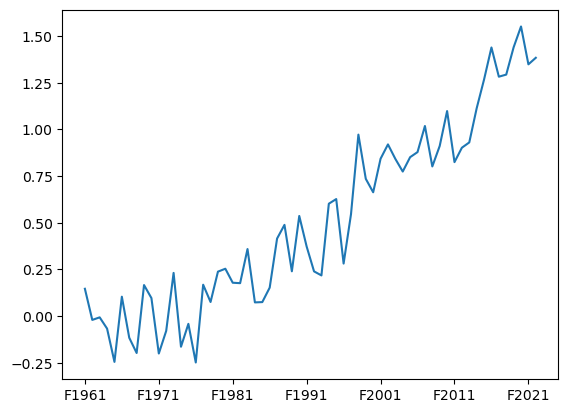

In [31]:
df.describe().loc['mean'][1:].plot(kind='line')

In [33]:
url = 'https://statisticstimes.com/geography/countries-by-continents.php'
country = pd.read_html(url, match='Afghanistan')[0]
country.head(5)

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [35]:
country.rename(columns={'Country or Area':'Country', 'ISO-alpha3 Code':'ISO3'}, inplace=True)
country.head()

,No,Country,ISO3,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [39]:
df2 = df.copy()
df2 = df2.merge(country, on='ISO3', how='inner')
df2.head()

,ObjectId,Country_x,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2019,F2020,F2021,F2022,No,Country_y,M49 Code,Region 1,Region 2,Continent
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.910,0.498,1.327,2.012,1,Afghanistan,4,Southern Asia,NaN,Asia
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.675,1.498,1.536,1.518,3,Albania,8,Southern Europe,NaN,Europe
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.115,1.926,2.330,1.688,4,Algeria,12,Northern Africa,NaN,Africa
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.539,1.430,1.268,1.256,5,American Samoa,16,Polynesia,NaN,Oceania
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.964,2.562,1.533,3.243,6,Andorra,20,Southern Europe,NaN,Europe


<Axes: >

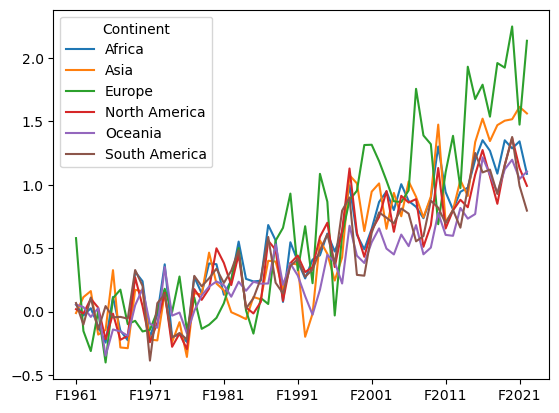

In [41]:
col = [f'F{y}' for y in range(1961, 2023)]
df2.groupby('Continent')[col].mean().T.plot(kind='line')

<Axes: >

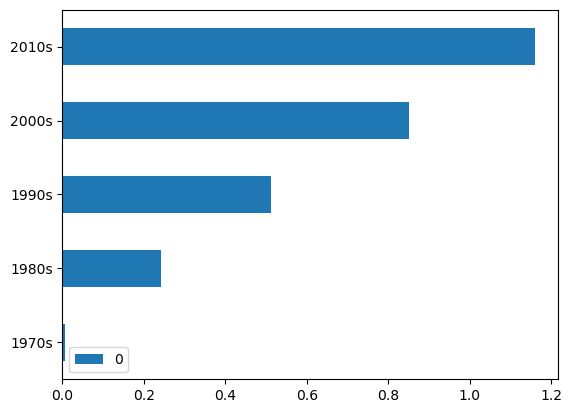

In [43]:
col = ['Country'] + [f'F{y}' for y in range(1962, 2023)]

d = dict()
for i in range(1970, 2020, 10):
    col = [f'F{y}' for y in range(i, i+10)]
    d[f'{i}s'] = df[col].mean(axis=1).mean()
    
pd.DataFrame.from_dict(d, orient='index').plot(kind='barh')

<Axes: title={'center': 'Range'}>

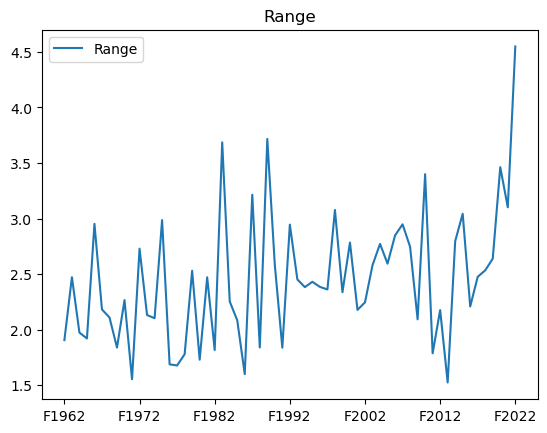

In [45]:
col = [f'F{y}' for y in range(1962, 2023)]
stats = df[col].agg(['mean', 'std', 'min', 'max']).transpose()
stats['Range'] = stats['max'] - stats['min']
stats.plot(kind='line', y='Range', title='Range')

In [47]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [51]:
# Drop columns that are not needed for your analysis
df_clean = df.drop(['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1)

In [53]:
df_clean.head()
df= df_clean
df.head()

,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [55]:
# Define the feature columns and target column
features = [f'F{i}' for i in range(1961, 2022)]  # Features from F1961 to F2021
target = 'F2022'  # Target column

In [57]:
# Create the feature matrix X and target vector y
X = df[features]
y = df[target]

In [59]:
X.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533


In [61]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [65]:
#Fit the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)  # Use 5 neighbors
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [67]:
y_pred= regressor.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [71]:
#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
#print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.12911373253731342
Mean Absolute Error (MAE): 0.2389910447761194
R² Score: 0.7382058502629751


Random Forest Regression Model

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
# Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# Predict on test data
y_pre = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
r2_ran = r2_score(y_test, y_pre)
print(f"Root Mean Squared Error: {rmse}")
print("R² Score:", r2_ran)

Root Mean Squared Error: 0.31014661166914387
R² Score: 0.8049609455941082


Linear Regression Model

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predi= reg.predict(X_test)

In [81]:
r2 = r2_score(y_test, y_predi)

mse = mean_squared_error(y_test, y_predi)
rmse = np.sqrt(mse)

In [83]:
print("R-squared (R²):", r2)

R-squared (R²): 0.8682840476692936


In [85]:
print(mse)

0.06496072680465706


XGboost Model

In [87]:
!pip install xgboost

In [89]:
import xgboost as xgb
# Initialize the XGBoost Regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

In [91]:
# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = xgboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.06357487353772466
R-squared (R²): 0.871094037517368
